In [1]:
!pip install stable-baselines3[extra] --no-cache-dir

In [2]:
print("Hey")

Hey


In [6]:
pip install pyglet==1.5.11

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install tensorboard

Note: you may need to restart the kernel to use updated packages.


<h1>GPU Acceleration with nVIDIA CUDA</h1>

In [26]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


<h1 style="font-size:50px;">Cart-Pole Balance</h1>

<h1>Import dependencies</h1>

In [1]:
import os
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

<h1>Load Environment</h1>

In [2]:
environment_name = "CartPole-v0"
# Create Env
env = gym.make(environment_name)

In [3]:
episodes = 20
# Loop through each episode
for episode in range(1, episodes+1):
    # Set environment state
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        # Display Ca rt Window
        env.render()
        # Set action as sample
        action = env.action_space.sample()
        # Return new state, reward, done state and info
        n_state, reward, done, info = env.step(action)
        # Keep tally of score
        score += reward
    
    print("Episode: {} Score: {}".format(episode, score))
    
# Close Window
env.close()

Episode: 1 Score: 16.0
Episode: 2 Score: 14.0
Episode: 3 Score: 13.0
Episode: 4 Score: 35.0
Episode: 5 Score: 70.0
Episode: 6 Score: 15.0
Episode: 7 Score: 19.0
Episode: 8 Score: 13.0
Episode: 9 Score: 17.0
Episode: 10 Score: 22.0
Episode: 11 Score: 23.0
Episode: 12 Score: 20.0
Episode: 13 Score: 36.0
Episode: 14 Score: 70.0
Episode: 15 Score: 41.0
Episode: 16 Score: 12.0
Episode: 17 Score: 19.0
Episode: 18 Score: 34.0
Episode: 19 Score: 24.0
Episode: 20 Score: 10.0


<h1> Understanding the Environment </h1>

In [4]:
env.reset()

array([ 0.00436018, -0.03756292, -0.03044576,  0.00598996], dtype=float32)

In [5]:
env.action_space

Discrete(2)

In [6]:
# 0 for left action, 1 for right action
env.action_space.sample()

1

In [7]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [8]:
# 4 values, cart/pole position/velocity
env.observation_space.sample()

array([ 4.6928244e+00,  2.6332095e+38,  3.9498246e-01, -6.8074546e+37],
      dtype=float32)

In [9]:
env.step(1)

(array([ 0.00360892,  0.15798214, -0.03032597, -0.29614136], dtype=float32),
 1.0,
 False,
 {})

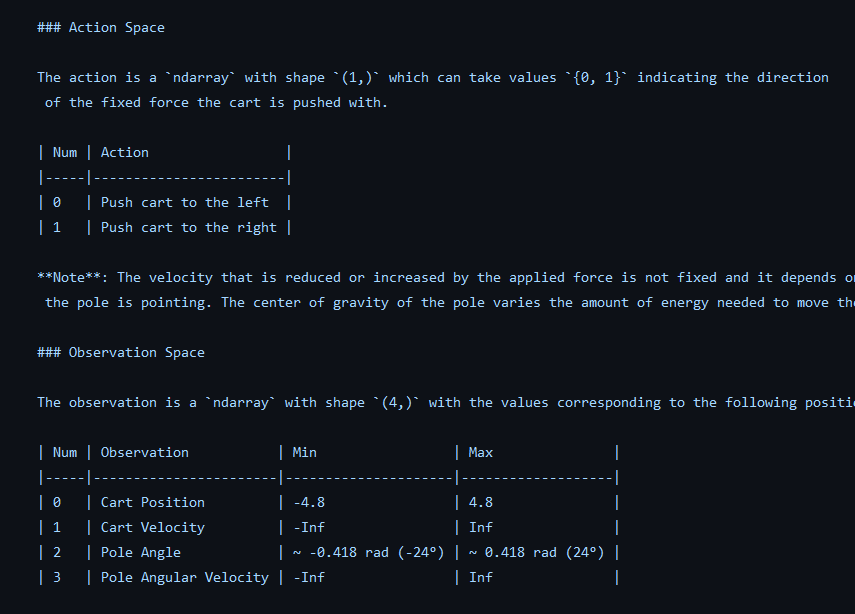

<h1>Algorithm</h1>

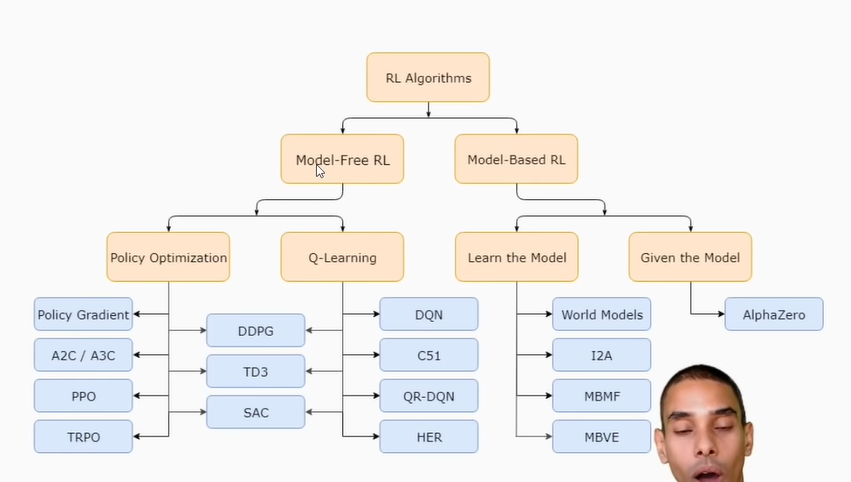

<h1>Train an RL Model</h1>

In [10]:
# MAKE YOUR DIRECTORIES FIRST
log_path = os.path.join('Training','Logs')

In [11]:
log_path

'Training\\Logs'

In [12]:
# Make environment
env = gym.make(environment_name)
# Wrapper for non-vectorised env
env = DummyVecEnv([lambda: env])
# Using PPO model
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [13]:
PPO??

In [14]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_2
-----------------------------
| time/              |      |
|    fps             | 2559 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1673         |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0080842525 |
|    clip_fraction        | 0.0934       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.686       |
|    explained_variance   | 0.00172      |
|    learning_rate        | 0.0003       |
|    loss                 | 6.12         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0158      |
|    value_loss           | 54.6         |
----------------------------

<h1>Saving and reloading the model</h1>

In [15]:
PPO_path = os.path.join('Training','Saved Models','PPO_Model_Cartpole')

In [16]:
PPO_path

'Training\\Saved Models\\PPO_Model_Cartpole'

In [17]:
model.save(PPO_path)

In [18]:
del model

In [19]:
model = PPO.load(PPO_path, env=env)

In [20]:
model

<h1>Evaluation</h1>

In [21]:
evaluate_policy(model, env, n_eval_episodes=20, render=True)

C:\Users\Tanush R\anaconda3\lib\site-packages\stable_baselines3\common\evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(200.0, 0.0)

In [22]:
env.close()

<h1>Test Model</h1>

In [25]:
episodes = 20
# Loop through each episode
for episode in range(1, episodes+1):
    # Set observation
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        # Display Cart Window
        env.render()
        # Set action to predicted value, ignore other so _
        action, _ = model.predict(obs)
        # Return new state, reward, done state and info
        obs, reward, done, info = env.step(action)
        # Keep tally of score
        score += reward
    
    print("Episode: {} Score: {}".format(episode, score))
    
# Close Window
env.close()

Episode: 1 Score: [178.]
Episode: 2 Score: [200.]
Episode: 3 Score: [176.]
Episode: 4 Score: [200.]
Episode: 5 Score: [200.]
Episode: 6 Score: [200.]
Episode: 7 Score: [132.]
Episode: 8 Score: [200.]
Episode: 9 Score: [200.]
Episode: 10 Score: [200.]
Episode: 11 Score: [200.]
Episode: 12 Score: [200.]
Episode: 13 Score: [200.]
Episode: 14 Score: [200.]
Episode: 15 Score: [200.]
Episode: 16 Score: [200.]
Episode: 17 Score: [200.]
Episode: 18 Score: [200.]
Episode: 19 Score: [200.]
Episode: 20 Score: [106.]


In [24]:
env.close()

In [27]:
obs = env.reset()

In [28]:
obs

array([[ 0.01475481, -0.02922212, -0.00979095, -0.01112738]],
      dtype=float32)

In [29]:
action, _ = model.predict(obs)

In [30]:
env.step(action)

(array([[ 0.01417036, -0.22420229, -0.0100135 ,  0.27845037]],
       dtype=float32),
 array([1.], dtype=float32),
 array([False]),
 [{}])

<h1> Viewing Logs in Tensorboard </h1>

In [31]:
training_log_path = os.path.join(log_path, 'PPO_2')

In [32]:
training_log_path

'Training\\Logs\\PPO_2'

In [35]:
!tensorboard --logdir={training_log_path}

^C


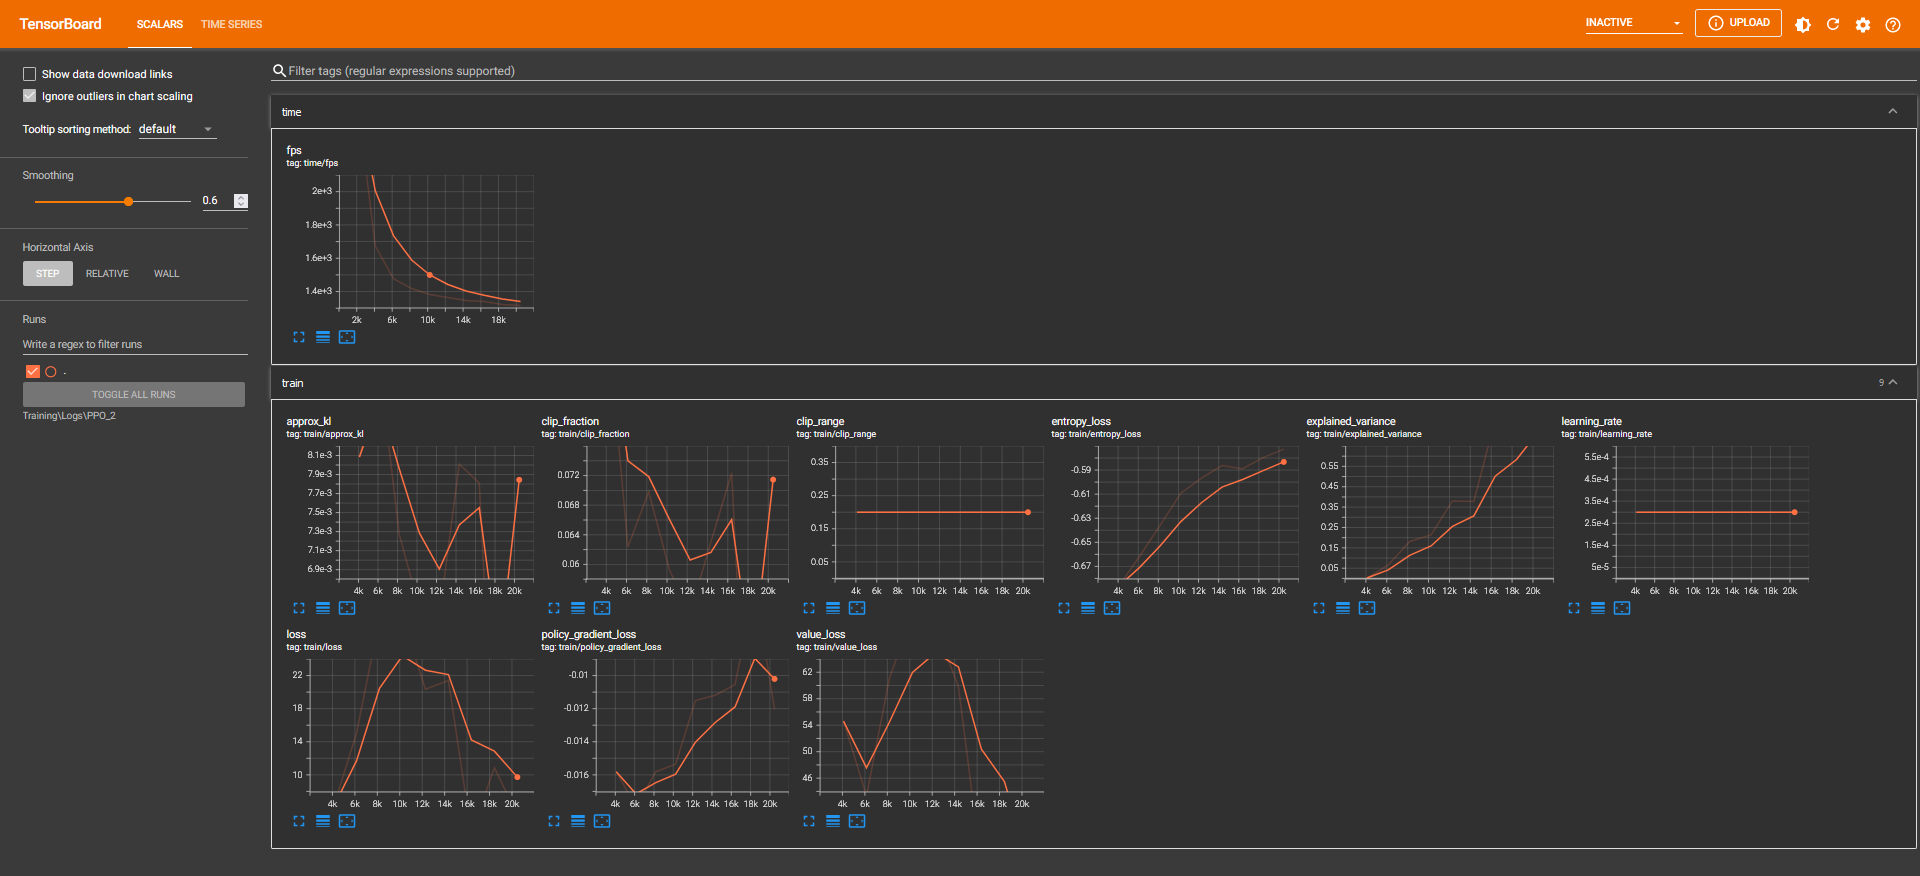